### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
#Looking to see shape of dataframe
data.shape

(12684, 26)

In [5]:
#Looking for missing data
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [6]:
#percent of missing data in different columns
print('Percent of missing "car" records is %.2f%%' %((data['car'].isnull().sum()/data.shape[0])*100))
print('Percent of missing "Bar" records is %.2f%%' %((data['Bar'].isnull().sum()/data.shape[0])*100))
print('Percent of missing "CoffeeHouse" records is %.2f%%' %((data['CoffeeHouse'].isnull().sum()/data.shape[0])*100))
print('Percent of missing "CarryAway" records is %.2f%%' %((data['CarryAway'].isnull().sum()/data.shape[0])*100))
print('Percent of missing "RestaurantLessThan20" records is %.2f%%' %((data['RestaurantLessThan20'].isnull().sum()/data.shape[0])*100))
print('Percent of missing "Restaurant20To50" records is %.2f%%' %((data['Restaurant20To50'].isnull().sum()/data.shape[0])*100))

Percent of missing "car" records is 99.15%
Percent of missing "Bar" records is 0.84%
Percent of missing "CoffeeHouse" records is 1.71%
Percent of missing "CarryAway" records is 1.19%
Percent of missing "RestaurantLessThan20" records is 1.02%
Percent of missing "Restaurant20To50" records is 1.49%


In [7]:
#dropping car column
data = data.drop(columns=['car'])

In [97]:
#Looking at distribution of missing data for each column, I replaced the x with all of the different columns
fig = px.histogram(data, x="CarryAway", title="missing data distribution")
fig.show()

I decided to drop the missing data because I don't feel there was a strong enough trend for me to be able to fill in the missing values accurately. Also, in total the missing values are a small percentage of my data

In [10]:
#dropping null values
data = data.dropna()

In [11]:
#checking for nulls after the cleaning
data.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

4. What proportion of the total observations chose to accept the coupon? 



In [12]:
#Calculating the accepted proportion of coupons in all

totalobservations = data.shape[0]

acceptedtotal = data['Y'].sum()

acceptedproportion = acceptedtotal / totalobservations

acceptedproportion


0.5693352098683666

5. Use a bar plot to visualize the `coupon` column.

Text(0.5, 1.0, 'Distribution of Coupon Types')

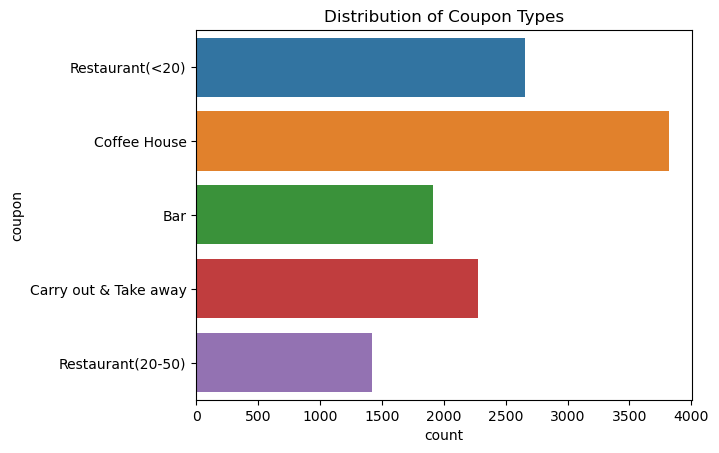

In [13]:
#creating barplot
figure = sns.countplot(data=data, y='coupon')
figure.set_title('Distribution of Coupon Types')

6. Use a histogram to visualize the temperature column.

Text(0, 0.5, 'Count')

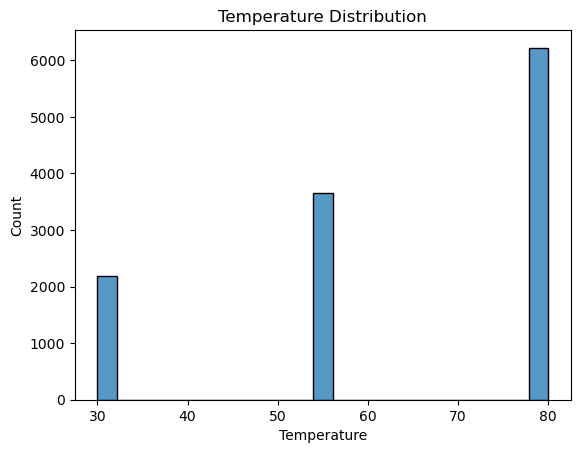

In [14]:
# Creating histogram
figure = sns.histplot(data['temperature'])
figure.set_title('Temperature Distribution')
figure.set_xlabel('Temperature')
figure.set_ylabel('Count')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [15]:
#creating new data frame for rows relating to bar coupons offered only 
bar_coupons = data[data['coupon'].str.contains("Bar")]

#confirming that is what I did 
bar_coupons.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0


2. What proportion of bar coupons were accepted?


In [16]:
#Calculating the accepted proportion of coupons in bar

totalbar = bar_coupons.shape[0]

acceptedtotalbar = bar_coupons['Y'].sum()

acceptedproportionbar = acceptedtotalbar / totalbar

acceptedproportionbar


0.41191845269210664

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [17]:
#setting up distinctive dataframes for grouping less than 3 and more than 3 

lessthanthree = bar_coupons[bar_coupons['Bar'].isin(['never', 'less1', '1~3'])]

whowentmore = bar_coupons[bar_coupons['Bar'].isin(['4~8','gt8'])]

In [18]:
#calculating ratio of accepted coupon for fewer than 3 times a month 
totalbar = lessthanthree.shape[0]

acceptedtotalbar3 = lessthanthree['Y'].sum()

acceptedproportionbar3 = acceptedtotalbar3 / totalbar

acceptedproportionbar3

0.37267441860465117

In [19]:
#calculating ratio of accepted coupon for more than 3 times a month
totalbar = whowentmore.shape[0]

acceptedtotalbarmore = whowentmore['Y'].sum()

acceptedproportionbarmore = acceptedtotalbarmore / totalbar

acceptedproportionbarmore

0.7616580310880829

The acceptance ratio is higher for patrons who visited a bar more than 3 times per month

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [20]:
#looking at data type of age and what values are there
bar_coupons['age'].unique()

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

In [21]:
#looking at data type of age and what values are there
bar_coupons['Bar'].unique()

array(['never', 'less1', '1~3', 'gt8', '4~8'], dtype=object)

In [22]:
#setting up a new data frame with only bar once a month and over 25 in age 
olderthan25baronce = bar_coupons[(bar_coupons['age'].isin(['46','26','31','41','50plus','36'])) & (bar_coupons['Bar'] !='never')]

In [23]:
#calculating ratio of accepted coupon for drivers where they were over 25 and went to the bar more than once a month
totalbar25 = olderthan25baronce.shape[0]

acceptedtotalbarmore25 = olderthan25baronce['Y'].sum()

acceptedproportionbarmore25 = acceptedtotalbarmore25 / totalbar25

acceptedproportionbarmore25

0.5452380952380952

the acceptance rate of drivers who go to a bar more than once a month and are over the age of 25 is in between the ratios of those who went to a bar 3 or fewer times and patrons who visited a bar more than 3 times per month. 

The rates are:

those who went to a bar 3 or fewer times = 0.372

patrons who visited a bar more than 3 times per month = 0.761

the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 = 0.545

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [24]:
#checking to see if farming/fishing/forestry is one profession or multiple
bar_coupons['occupation'].unique()

array(['Architecture & Engineering', 'Student',
       'Education&Training&Library', 'Unemployed', 'Healthcare Support',
       'Healthcare Practitioners & Technical', 'Sales & Related',
       'Management', 'Arts Design Entertainment Sports & Media',
       'Computer & Mathematical', 'Life Physical Social Science',
       'Personal Care & Service', 'Office & Administrative Support',
       'Construction & Extraction', 'Legal', 'Retired',
       'Community & Social Services', 'Installation Maintenance & Repair',
       'Transportation & Material Moving', 'Business & Financial',
       'Protective Service', 'Food Preparation & Serving Related',
       'Production Occupations',
       'Building & Grounds Cleaning & Maintenance',
       'Farming Fishing & Forestry'], dtype=object)

In [25]:
#setting up a new data frame with filters
question5filters = bar_coupons[(bar_coupons['Bar'] !='never') & 
                               (bar_coupons['passanger'] !='Kid(s)') & 
                              (bar_coupons['occupation'] !='Farming Fishing & Forestry')]

In [26]:
#calculating ratio of accepted coupon for drivers
question5filterstotal = question5filters.shape[0]

accepted5 = question5filters['Y'].sum()

ratioaccepted5 = accepted5 / question5filterstotal

ratioaccepted5

0.5933528836754643

The rates are:

those who went to a bar 3 or fewer times = 0.372

patrons who visited a bar more than 3 times per month = 0.761

the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 = 0.545

drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.= 0.593

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [27]:
bar_coupons['RestaurantLessThan20'].unique()

array(['4~8', '1~3', 'less1', 'gt8', 'never'], dtype=object)

In [28]:
#setting up a new data frame with filters
question6filters = bar_coupons[(bar_coupons['Bar'] !='never') & 
                               (bar_coupons['passanger'] !='Kid(s)') & 
                              (bar_coupons['maritalStatus'] !='Widowed')]

In [29]:
#calculating ratio of accepted coupon for drivers that were not with a kid, were not widowed and go to a bar more than once a month
question6filterstotal = question6filters.shape[0]

accepted6 = question6filters['Y'].sum()

ratioaccepted6 = accepted6 / question6filterstotal

ratioaccepted6

0.5968688845401174

In [33]:
#setting up a new data frame with only bar once a month and under 30 in age 
under30baronce = bar_coupons[(bar_coupons['age'].isin(['21','26','below21'])) & (bar_coupons['Bar'] !='never')]

In [34]:
#calculating ratio of accepted coupon for drivers bar once a month and under 30 in age 
under30baroncetotal = under30baronce.shape[0]

acceptedamt = under30baronce['Y'].sum()

ratioacceptedamt = acceptedamt / under30baroncetotal

ratioacceptedamt

0.6475095785440613

In [35]:
# data frame go to cheap restaurants more than 4 times a month and income is less than 50K
question6Bfilters = bar_coupons[(bar_coupons['RestaurantLessThan20'].isin(['4~8','gt8'])) & 
                               (bar_coupons['income'].isin(['$12500 - $24999','$37500 - $49999','$25000 - $37499','Less than $12500']))]

In [36]:
#calculating ratio of accepted coupon for drivers who go to cheap restaurants more than 4 times a month and income is less than 50K
question6bfilterstotal = question6Bfilters.shape[0]

accepted6b = question6Bfilters['Y'].sum()

ratioaccepted6b = accepted6b / question6bfilterstotal

ratioaccepted6b

0.45645645645645644

In [37]:
#curious how kids in the car would impact this output
question6filters = bar_coupons[(bar_coupons['Bar'] !='never') & 
                               (bar_coupons['passanger'] == 'Kid(s)')
                              ]
question6filterstotal = question6filters.shape[0]

accepted6 = question6filters['Y'].sum()

ratioaccepted6 = accepted6 / question6filterstotal

ratioaccepted6

0.29591836734693877

Much much lower acceptance ratio when there is a kid or kids in the car

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Based on these observations I hypothesize the driver most likely to accept the bar coupon will be those who have reported going to bars more than 3 times a month. It is also likely that there will not be a kid or kids in the car as passangers for the coupon to be accepted. The group second most likely to accept the coupong is those under 30 who go to the bar at least once per month

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [38]:
#I am going to look into the Coffee House coupons
#creating data frame for coffee house coupons 
coffee_coupons = data[data['coupon'].str.contains("Coffee House")]

#confirming that is what I did 
coffee_coupons.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
27,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
28,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
30,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0


In [62]:
#looking at the basic descriptive values for my new coffee coupon specific data
coffee_coupons.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,3816.000000,3816.000000,3816.0,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000
mean,68.096174,0.381551,1.0,0.519392,0.078092,0.187631,0.812369,0.496331
std,15.934365,0.485831,0.0,0.499689,0.268352,0.390468,0.390468,0.500052
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,0.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [68]:
#What is the coffee coupon acceptance rate?
acceptanceratecoffeecoupon = (coffee_coupons['Y'] == 1).mean()
acceptanceratecoffeecoupon

0.49633123689727465

In [69]:
#What is the acceptance rate of a coffee house coupon for those going to no urgent place compared to other destinations?

# Filtering for 'No Urgent Place' and other destinations
no_urgent_place_data = coffee_coupons[coffee_coupons['destination'] == 'No Urgent Place']
other_destinations_data = coffee_coupons[coffee_coupons['destination'] != 'No Urgent Place']

# Calculating the acceptance rate for both categories
acceptance_rate_no_urgent_place = no_urgent_place_data['Y'].mean()
acceptance_rate_other_destinations = other_destinations_data['Y'].mean()

acceptance_rate_no_urgent_place, acceptance_rate_other_destinations



(0.5781782756941062, 0.4010209869540556)

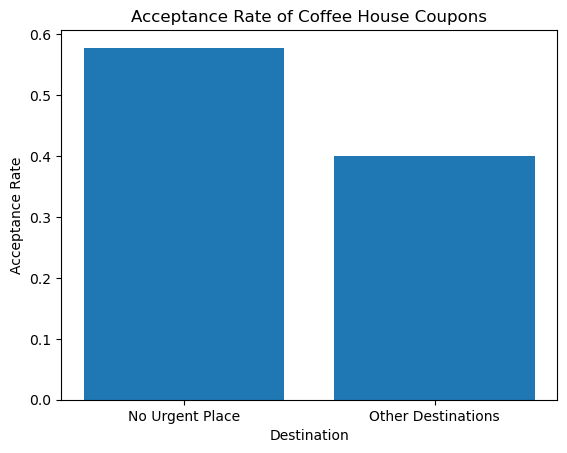

In [70]:
# Adding the data for plotting acceptance rates
categories = ['No Urgent Place', 'Other Destinations']
rates = [acceptance_rate_no_urgent_place, acceptance_rate_other_destinations]

# Creating a bar plot
plt.bar(categories, rates)
plt.xlabel('Destination')
plt.ylabel('Acceptance Rate')
plt.title('Acceptance Rate of Coffee House Coupons')
plt.show()

We can see from the calculations that the coffee coupon acceptance rate is higher for those going to no urgent place compared to those who reported going to work or home

Question: what is the proportion of people who accept the coupon who go to coffee houses once or more per month?

In [73]:
#creating new data frame for coffee house once or more per month
coffeehousemorethanonce = coffee_coupons[(coffee_coupons['CoffeeHouse'].isin(['1~3','4~8','gt8']))]

#calculating ratio of accepted coupon for drivers who go to coffee house once or more per month
Coffeehousetotal = coffeehousemorethanonce.shape[0]

coffeehouseaccepted = coffeehousemorethanonce['Y'].sum()

coffeehouseratioaccepted = coffeehouseaccepted / Coffeehousetotal

coffeehouseratioaccepted

0.6589935760171306

Question: What is the proportion of drivers who will accept the coupon and are driving alone and have an income above 50k?

In [92]:
#creating new data frame for driving alone and have an income above 50k
alone50k = coffee_coupons[(coffee_coupons['passanger'] == 'Alone') & 
                               (coffee_coupons['income'].isin(['$62500 - $74999','$$75000 - $87499','$50000 - $62499','$100000 or More','$87500 - $99999']))]

#calculating ratio of accepted coupon for drivers who go to coffee house once or more per month
Coffeehousetotal2 = alone50k.shape[0]

coffeehouseacceptedalone50k = alone50k['Y'].sum()

coffeehouseratioaccepted50kalone = coffeehouseacceptedalone50k / Coffeehousetotal2

coffeehouseratioaccepted50kalone

0.42248520710059173

How does that compare to those drivers who are not driving alone?

In [93]:
#creating new data frame for driving not alone and have an income above 50k
notalone50k = coffee_coupons[(coffee_coupons['passanger'] != 'Alone') & 
                               (coffee_coupons['income'].isin(['$62500 - $74999','$$75000 - $87499','$50000 - $62499','$100000 or More','$87500 - $99999']))]

#calculating ratio of accepted coupon for drivers who go to coffee house once or more per month
Coffeehousetotal2 = notalone50k.shape[0]

coffeehouseacceptedalone50knotalone = notalone50k['Y'].sum()

coffeehouseratioaccepted50knotalone = coffeehouseacceptedalone50knotalone / Coffeehousetotal2

coffeehouseratioaccepted50knotalone

0.5724431818181818

Based on the above calculations, drivers are more likely to accept the coupon for the 50k and above salary range if they are not alone in the car - that's not what I would expect, that's interesting to me so I am going to look deeper into the passanger data

In [96]:
#creating data frame for accepted coupons
accepted_coffee_coupons = coffee_coupons[coffee_coupons['Y'] == 1]

# Create the histogram for the filtered DataFrame
fig = px.histogram(accepted_coffee_coupons, x="passanger",title="Passanger Distribution of coupon acceptors")
fig.show()

## Findings

### Overview
- This analysis focused on understanding the factors influencing the acceptance of coupons. Specifically, I looked most in depth at bar coupons and coffee coupons. I looked into variables including passenger types, income, occupation, and other relevant factors to attempt to identify patterns and insights.

### Key Insights
1. **Coffee Coupons**: Based on my findings, targeting coffee coupons at drivers accompanied by a passangar when they are not headed any place urgent could enhance acceptance rates.

2. **Bar Coupons**: I found that from all of the variables I looked at that the driver most likely to accept the bar coupon will be those who have reported going to bars more than 3 times a month. It is also likely that there will not be a kid or kids in the car as passangers for the coupon to be accepted. The group second most likely to accept the coupong is those under 30 who go to the bar at least once per month


### Limitations and Assumptions
- While I looked into a great deal of variables surrounding the coupon acceptance, there is a lot of data that I did not have the time to look into. This limitation could lead to inaccuracies in the coupon acceptance rates that I've calculated. 

- I did not look at all of the coupon types, my analysis was mostly focused on the bar coupons and then a separate analysis for the coffee coupons. 

### Recommendations and Further Research

- Further research could look into other coupon types. Also, there are other variables related to bar coupon and coffee coupon acceptance that would be worth looking into. 
- For example, the type of passanger and if that is related to coupon acceptance. 

### Conclusion
- These insights can inform more effective coupon distribution strategies, potentially increasing acceptance rates and customer engagement.
